In [1]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

In [2]:
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D,Activation,MaxPooling2D
from keras.layers import Concatenate
from keras import Input
from keras.callbacks import ModelCheckpoint

input_shape=data.shape[1:] #50,50,1
inp=Input(shape=input_shape)
convs=[]

parrallel_kernels=[3,5,7]

for k in range(len(parrallel_kernels)):

    conv = Conv2D(128, parrallel_kernels[k],padding='same',activation='relu',input_shape=input_shape,strides=1)(inp)
    convs.append(conv)

out = Concatenate()(convs)
conv_model = Model(inp, out)

model = Sequential()
model.add(conv_model)

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4,input_dim=128,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model (Functional)          (None, 100, 100, 384)     11008     
                                                                 
 conv2d_3 (Conv2D)           (None, 98, 98, 64)        221248    
                                                                 
 activation (Activation)     (None, 98, 98, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 64)       0         
 )                                                               
                                                                 
 conv2d_4 (Conv2D)           (None, 47, 47, 32)        18464     
                                                                 
 activation_1 (Activation)   (None, 47, 47, 32)        0         
                                                        

In [3]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [5]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=25,callbacks=[checkpoint],validation_split=0.1)

Epoch 1/25
29/29 [==============================] - 87s 3s/step - loss: 0.5204 - accuracy: 0.7987 - val_loss: 1.6369 - val_accuracy: 0.4466
Epoch 2/25
29/29 [==============================] - 87s 3s/step - loss: 0.4717 - accuracy: 0.8247 - val_loss: 1.9204 - val_accuracy: 0.3786
Epoch 3/25
29/29 [==============================] - 90s 3s/step - loss: 0.4325 - accuracy: 0.8442 - val_loss: 1.8674 - val_accuracy: 0.3495
Epoch 4/25
29/29 [==============================] - 89s 3s/step - loss: 0.4533 - accuracy: 0.8366 - val_loss: 1.8304 - val_accuracy: 0.3689
Epoch 5/25
29/29 [==============================] - 86s 3s/step - loss: 0.4245 - accuracy: 0.8561 - val_loss: 1.9096 - val_accuracy: 0.4078
Epoch 6/25
29/29 [==============================] - 87s 3s/step - loss: 0.3559 - accuracy: 0.8766 - val_loss: 2.1285 - val_accuracy: 0.4078
Epoch 7/25
29/29 [==============================] - 89s 3s/step - loss: 0.3719 - accuracy: 0.8626 - val_loss: 2.0308 - val_accuracy: 0.3301
Epoch 8/25
29/29 [==

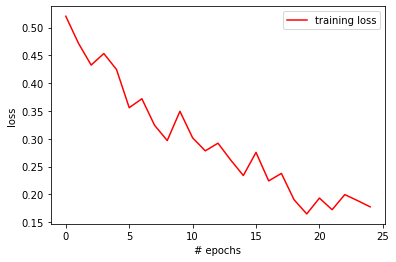

In [6]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

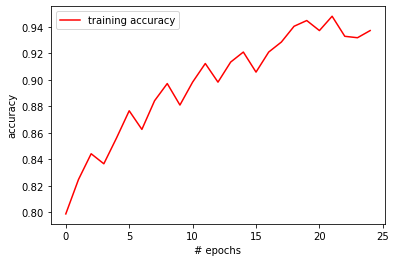

In [7]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.xlabel('# epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [8]:
model.save('ldd_model')

INFO:tensorflow:Assets written to: ldd_model\assets
